In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from utils import LogScaler

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("diamonds.csv")
df.drop("Unnamed: 0",axis=1,inplace=True) # dropping the useless column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
# data has no missing values
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

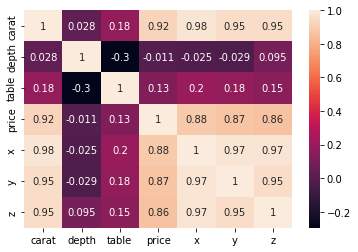

In [4]:
# checking correlation
sb.heatmap(df.corr(),annot=True)

From the heatmap, it can be seen, features "carat","x","y","z" are all highly correlated 
to each other and the with target feature, "price" as well, so we only keep "carat" and drop "x","y","z"

In [5]:
df=df.drop(['x','y','z'],axis=1)

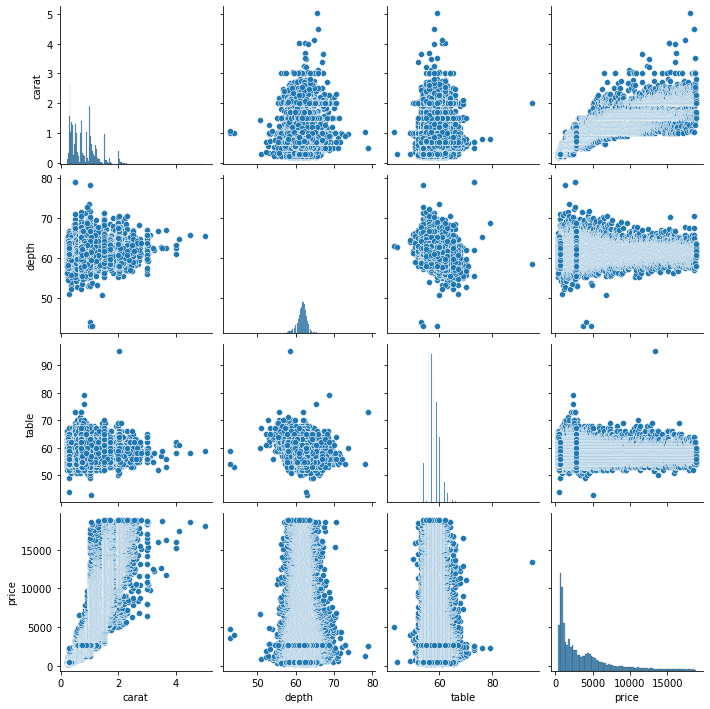

In [6]:
# visualising the relation features (continous)
sb.pairplot(df[["carat","depth","table","price"]],)

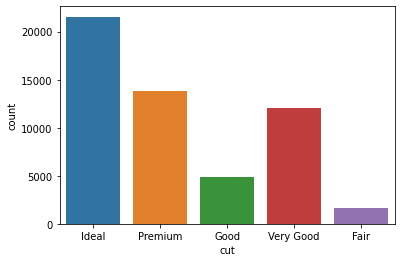

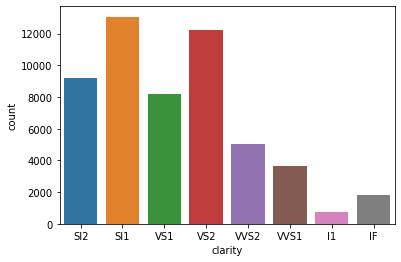

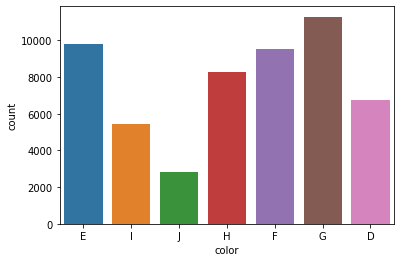

In [7]:
# visualizing the count of each categorical feature

sb.countplot(x=df.cut)
plt.show()

sb.countplot(x=df.clarity)
plt.show()

sb.countplot(x=df.color)
plt.show()

From these countplots, features "cut", "clarity" and "color" has 5, 8 and 7 classes respectively\

from the data source https://www.kaggle.com/datasets/shivam2503/diamonds, we are given certain info about these 3 features\

"cut" -> quality of the cut (Fair, Good, Very Good, Premium, Ideal)\
"clarity" -> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))\
"color" -> diamond colour, from J (worst) to D (best)\

Lets map the classes of the features as per this info

In [8]:
# mapping "cut" column
df.cut = df.cut.map({"Fair":0,"Good":1,"Very Good":2,"Premium":3,"Ideal":4})

# mapping "clarity" column
df.clarity.unique()
df.clarity = df.clarity.map({
    "I1":0,"SI2":1,"SI1":2,"VS2":3,
    "VS1":4,"VVS2":5,"VVS1":6,"IF":7
})

# mapping "color" column
mapping = {}

colors = sorted(df.color.unique())
val = len(colors)

for c in colors:
    mapping[c]=val
    val-=1

df.color = df.color.map(mapping)

<AxesSubplot:>

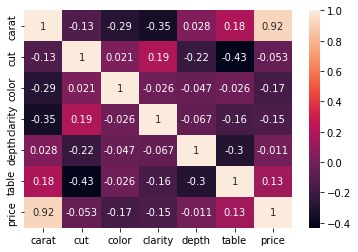

In [9]:
# checking the correlation again
sb.heatmap(df.corr(),annot=True)

Now the features "cut", "color" and "clarity" have correlation with the target feature

## Data preparation and Model building

In [10]:
# splitting the target feature and the input features
x = df.drop(["price"],axis=1).values
y = df.price.values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=0)

# scale the features vectors
scaler = LogScaler()
xtrain,ytrain = scaler.fit_transform(xtrain,ytrain)
xtest = scaler.transform(xtest)

linear regression
mae : 851.57758776118


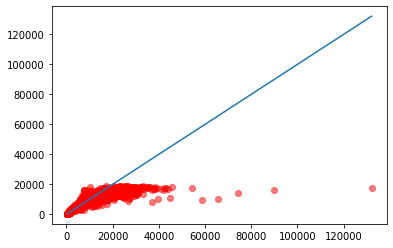


xgboost
mae : 275.7965017848427


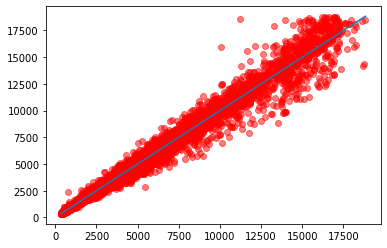


random forest
mae : 279.981947164349


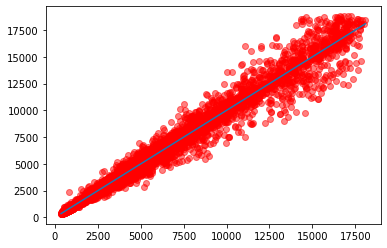

In [11]:
# building different regression models and scoring the results

lin,xgb,rfr = LinearRegression(), XGBRegressor(), RandomForestRegressor()
regs = {"linear regression":lin,"xgboost":xgb,"random forest":rfr}

def plot_logs(ytest,ypred):
    plt.scatter(x=ytest,y=ypred,color='red',alpha=0.5)
    sb.lineplot(x=ytest,y=ytest)
    plt.show()

for r in regs:
    regs[r].fit(xtrain,ytrain)
    pred = regs[r].predict(xtest)
    pred = np.exp(pred)
    print(r)
    print(f'mae : {mean_absolute_error(pred,ytest)}')
    plot_logs(pred,ytest)
    print()
    

    
